# England and Wales House Prices 2018-2022

Source: [Gov.uk](https://www.gov.uk/government/statistical-data-sets/price-paid-data-downloads)
Guidance: [About the price paid data](https://www.gov.uk/guidance/about-the-price-paid-data)

In [2]:
# Importing relevant modules

import pandas as pd
import seaborn as sns
from zipfile import ZipFile

## Data Cleaning

In [4]:
# Create pandas dataframe for each year to be analised

# Set start and end years of the analysis

start_year = 2018
end_year = 2022

# List where each yearly dataframe will be stored

dfs = []

# This loop will create a dataframe for each year to be analised. Each dataset is stored in a zip file so they need to be extracted first.

for year in range(start_year, end_year+1):
    with ZipFile(f'data/pricepaid/pp-{year}.zip', 'r') as zObject:
        zObject.extractall(path='data/pricepaid/')
    df = pd.read_csv(f'data/pricepaid/pp-{year}.csv',
        header=None,
        names=['Tid', 'Price', 'Date of Transfer', 'Postcode', 'Property Type', 'Old/New', 'Duration', 'PAON', 'SAON', 'Street', 'Locality', 
            'Town/City', 'District', 'County', 'PPD Category Type', 'Record type'],
        parse_dates=['Date of Transfer'])
    dfs.append(df)
    

In [5]:
# Concatenate all the individual yearly dataframes into one

df = pd.concat(dfs)

In [6]:
# Turn off scientific notation

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [7]:
# Display information about the dataframe created

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5062858 entries, 0 to 899433
Data columns (total 16 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Tid                object        
 1   Price              int64         
 2   Date of Transfer   datetime64[ns]
 3   Postcode           object        
 4   Property Type      object        
 5   Old/New            object        
 6   Duration           object        
 7   PAON               object        
 8   SAON               object        
 9   Street             object        
 10  Locality           object        
 11  Town/City          object        
 12  District           object        
 13  County             object        
 14  PPD Category Type  object        
 15  Record type        object        
dtypes: datetime64[ns](1), int64(1), object(14)
memory usage: 656.7+ MB


In [8]:
# Check header

df.head()

,Tid,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category Type,Record type
0,{79A74E21-D11E-1289-E053-6B04A8C01627},770000,2018-09-25,SK7 1AR,D,N,F,5,NaN,OAK MEADOW,BRAMHALL,STOCKPORT,STOCKPORT,GREATER MANCHESTER,A,A
1,{79A74E21-D11F-1289-E053-6B04A8C01627},253500,2018-09-24,M6 8GQ,D,N,F,1,NaN,RIVINGTON ROAD,NaN,SALFORD,SALFORD,GREATER MANCHESTER,A,A
2,{79A74E21-D120-1289-E053-6B04A8C01627},231950,2018-09-28,WA3 2UE,D,Y,F,35,NaN,STONEACRE CLOSE,LOWTON,WARRINGTON,WIGAN,GREATER MANCHESTER,A,A
3,{79A74E21-D121-1289-E053-6B04A8C01627},112500,2018-08-29,OL6 6RJ,S,N,F,102,NaN,THORNFIELD GROVE,NaN,ASHTON-UNDER-LYNE,TAMESIDE,GREATER MANCHESTER,A,A
4,{79A74E21-D122-1289-E053-6B04A8C01627},184995,2018-06-15,M46 0TW,S,Y,F,37,NaN,THREADNEEDLE PLACE,ATHERTON,MANCHESTER,WIGAN,GREATER MANCHESTER,A,A


In [7]:
# Check if there are any duplicated transaction IDs

df[df['Tid'].duplicated() == True]

,Tid,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category Type,Record type


In [8]:
# Delete transactions where Property Type is O (Other). We only want to analise the following categories:
# D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes

df = df.drop(df[df['Property Type'] == 'O'].index)

In [9]:
# Delete transactions where PPD Category Type is B (Additional Price Paid). We only want to analise 
# Type A (Standard Price Paid)

df = df.drop(df[df['PPD Category Type'] == 'B'].index)

In [10]:
# Check if there are any other values in Property Type column other than the previously specified

df['Property Type'].value_counts()

Property Type
S    690631
T    656393
D    629587
F    405955
Name: count, dtype: int64

In [11]:
# Check if there are any other values in PPD Category Type column other than the previously specified

df['PPD Category Type'].value_counts()

PPD Category Type
A    2382566
Name: count, dtype: int64

In [12]:
# Check if there are any record types that aren't new transactions (Record type 'A')

df['Record type'].value_counts()

Record type
A    2382566
Name: count, dtype: int64

In [13]:
df.describe()

,Price,Date of Transfer
count,2382566.00000,2382566
mean,330377.06167,2020-07-12 01:07:45.238571008
min,1.00000,2018-01-01 00:00:00
25%,169950.00000,2019-04-18 00:00:00
50%,259995.00000,2020-09-30 00:00:00
75%,392000.00000,2021-08-31 00:00:00
max,51883694.00000,2022-12-30 00:00:00
std,355701.85869,NaN


In [14]:
# Check columns with Null values

df.isna().any() 

Tid                  False
Price                False
Date of Transfer     False
Postcode              True
Property Type        False
Old/New              False
Duration             False
PAON                 False
SAON                  True
Street                True
Locality              True
Town/City            False
District             False
County               False
PPD Category Type    False
Record type          False
dtype: bool

In [15]:
# From the previous query, we can see there are null values in the Postcode column. We calculate how many there are

df['Postcode'].isnull().sum()

469

In [16]:
# Drop rows with null values in Postcode column

df.dropna(subset = ['Postcode'], inplace=True)

In [17]:
# Create new dataframe that contains only Greater London information

df_london = df.loc[df.County == 'GREATER LONDON']

In [19]:
df_london.head()

,Tid,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category Type,Record type
1405,{75050A85-94A3-9A88-E053-6B04A8C02390},354000,2018-08-03,BR6 0TR,T,N,F,8,NaN,COWDEN ROAD,NaN,ORPINGTON,BROMLEY,GREATER LONDON,A,A
1406,{75050A85-94A4-9A88-E053-6B04A8C02390},392000,2018-07-27,KT6 5BH,F,N,L,36,FLAT 2,HOOK ROAD,NaN,SURBITON,KINGSTON UPON THAMES,GREATER LONDON,A,A
1407,{75050A85-94A5-9A88-E053-6B04A8C02390},545000,2018-08-24,SW17 0PS,T,N,F,137,NaN,STRATHDON DRIVE,NaN,LONDON,WANDSWORTH,GREATER LONDON,A,A
1408,{75050A85-94A6-9A88-E053-6B04A8C02390},269000,2018-06-29,BR6 6AX,T,N,F,22,NaN,KINGSLEY ROAD,NaN,ORPINGTON,BROMLEY,GREATER LONDON,A,A
1409,{75050A85-94A7-9A88-E053-6B04A8C02390},335000,2018-08-16,DA7 5QZ,S,N,F,36,NaN,KING HAROLDS WAY,NaN,BEXLEYHEATH,BEXLEY,GREATER LONDON,A,A


In [22]:
df_london.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250764 entries, 1405 to 899215
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Tid                250764 non-null  object        
 1   Price              250764 non-null  int64         
 2   Date of Transfer   250764 non-null  datetime64[ns]
 3   Postcode           250764 non-null  object        
 4   Property Type      250764 non-null  object        
 5   Old/New            250764 non-null  object        
 6   Duration           250764 non-null  object        
 7   PAON               250764 non-null  object        
 8   SAON               91615 non-null   object        
 9   Street             250759 non-null  object        
 10  Locality           16324 non-null   object        
 11  Town/City          250764 non-null  object        
 12  District           250764 non-null  object        
 13  County             250764 non-null  object    

<Axes: xlabel='Price'>

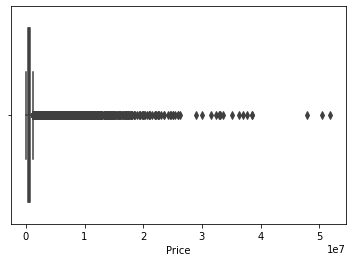

In [24]:
# Identifying outliers in the Price data

sns.boxplot(x = df_london['Price'])

In [ ]:
# Deleting outliers



## Descriptive Analysis

In [25]:
# Number of transactions in Greater London 2018-2022

df_london.Tid.count()

250764

In [26]:
# Average price paid in Greater London 2018-2022

df_london.Price.mean()

663330.9901261744

In [27]:
# Average price per property type in Greater London 2018-2022
# D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes

df_london.groupby(['Property Type'])['Price'].mean()

Property Type
D   1176922.43837
F    557242.63965
S    712630.73221
T    736070.39231
Name: Price, dtype: float64

In [32]:
# Average price paid per year

df_london.groupby([df_london['Date of Transfer'].dt.year])['Price'].mean()

Date of Transfer
2018   618461.33923
2019   620785.15598
2020   666241.48304
2021   674281.69499
2022   735266.27092
Name: Price, dtype: float64